# <font color = 'Orange'> **Data Visualization for Content Strategy - Neflix** </font>


---





In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [3]:
# import zipfile library to extract the file downloaded from Kaggle
import zipfile

# import kaggle library to download the dataset from Kaggle
import kaggle

In [4]:
# import the necessary libraries for data reading, cleaning, manipulation and Plotting
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [5]:
!kaggle datasets download shivamb/netflix-shows

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 33.0MB/s]


In [6]:
with zipfile.ZipFile('netflix-shows.zip','r') as file:
    file.extractall()

In [7]:
# reading the csv file using pandas read_csv()
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##  **Basic Data Exploration - High level statistics of the dataset**



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
print("\nHigh Level Statistics: ")
print("Number of Points:", len(df))
print("Number of features: ",df.shape )
print("Number of Types: ", df["type"].nunique())
print("Number of Data points per Type: ", df["type"].value_counts())


High Level Statistics: 
Number of Points: 8807
Number of features:  (8807, 12)
Number of Types:  2
Number of Data points per Type:  type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [10]:
#check if there are any duplicate rows
df.duplicated().sum()

0

In [11]:
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [12]:
# check for the count of null values for all
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


### Observations:


1.   There are in total 8807 rows with 12 columns
2.   All the columns data types are objects except release_year column
3.   Contains null values in 6 columns ('director', 'country', 'cast', 'date_added', 'rating', 'duration')



## **Data Cleaning**

### **Approach:**

1. **Unnest Columns with Multiple Values:**
   - For columns containing comma-separated values (e.g., lists), use `explode()` or `melt()` to transform each item into a separate row for proper analysis.

2. **Identify and Handle Null Values:**
   - Inspect all columns for missing data (null values).
   - Apply appropriate imputation methods for missing values:
     - For **director** and **cast**, replace null values with the most popular director or cast based on the respective country (i.e., most frequent director or cast for movies in that country).
     - For other columns, use standard imputation techniques such as **Mean/Median/Mode**, or remove rows/columns if null values significantly impact the analysis.

3. **Convert Date Column to Proper DateTime Format:**
   - Convert the `"date_added"` column to `pd.to_datetime()` for consistent date handling.

4. **Extract Date Components:**
   - Derive new columns from `"date_added"`: `"day_added"`, `"month_added"`, and `"year_added"` to facilitate detailed time-based analysis.



In [13]:
df[df['duration'].isna()]
# we can see here in rating column we have duration and duration is null
# here replacinng the duration column from respective rating column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [14]:
duration_nan = df['duration'].isna()
df.loc[duration_nan, 'duration'] = df.loc[duration_nan, 'rating']

In [15]:
date = {"A Young Doctor's Notebook and Other Stories" : 'September 15, 2014',
       "Anthony Bourdain: Parts Unknown" : 'June 1, 2020',
        "Frasier" : 'April 1, 2015',
        "Friends" : 'January 1, 2015',
        "Gunslinger Girl" : 'January 4, 2016',
        "Kikoriki" : 'July 6, 2017',
        "La Familia P. Luche" : 'June 1, 2015',
        "Maron" : 'November 2, 2018',
        "Red vs. Blue" : 'March 21, 2015',
        "The Adventures of Figaro Pho": 'January 1, 2016'}

df['date_added'] = df['title'].map(date).fillna(df['date_added'])

ratings = {"13TH: A Conversation with Oprah Winfrey & Ava DuVernay" : 'TV-PG',
         "Gargantia on the Verdurous Planet" : 'TV-PG',
          "Little Lunch" : 'TV-Y',
          "My Honor Was Loyalty" : 'PG-13',
          "Louis C.K. 2017" : 'TV-MA',
          "Louis C.K.: Hilarious" : 'TV-MA',
          "Louis C.K.: Live at the Comedy Store":'TV-MA'}

df['rating'] = df['title'].map(ratings).fillna(df['rating'])

In [16]:
print('Columns with Null Values')
print("--" * 12)
for i in df.columns:
  if df[i].isna().sum() > 0:
    print(i,':',df[i].isna().sum())

Columns with Null Values
------------------------
director : 2634
cast : 825
country : 831



### Un-Nesting :




Un-Nesting

In [17]:
df['cast'] = df['cast'].str.split(r',\s*')
df['listed_in'] = df['listed_in'].str.split(r',\s*')
df['country'] = df['country'].str.split(r',\s*')
df['director'] = df['director'].str.split(r',\s*')

In [18]:
df = df.explode('cast').explode('listed_in').explode('country').explode('director')

In [19]:
df['cast'] = df['cast'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()
df['country'] = df['country'].str.strip()
df['director'] = df['director'].str.strip()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202065 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director      151422 non-null  object
 4   cast          199916 non-null  object
 5   country       190168 non-null  object
 6   date_added    202065 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        202065 non-null  object
 9   duration      202065 non-null  object
 10  listed_in     202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [21]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [22]:
print('Columns with Null Values')
print("--" * 12)
for i in df.columns:
  if df[i].isna().sum() > 0:
    print(i,':',df[i].isna().sum())

Columns with Null Values
------------------------
director : 50643
cast : 2149
country : 11897


In [23]:
# drop the description columns
df.drop(columns=['description'],inplace=True)

### Handling Missing Data for Directors and Cast

- **Directors (30% Missing)**: Imputing missing values in this column can potentially cause up to 1/3 of the movies to have incorrect director attributions. This could severely skew the top 10 rankings, as inaccurate director information could distort key analyses.

- **Cast (10% Missing)**: While the impact of missing cast data is less significant compared to directors, imputing these values could still have a noticeable effect on visualizations.

Therefore, I am opting to replace missing values with `"Unknown"` to avoid introducing inaccuracies in the rankings.

### Option to Impute Missing Values

For those who prefer to impute missing values instead of replacing them with `"Unknown"`, the following code under 'Imputation for Missing Values' section can be used to perform the imputation


In [24]:
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace = True)

#### Imputation for Missing Values

In [25]:
if False:      # to block from running
    # Identify the most common country for each director
    mode_country_director = (
        df.groupby('director')['country']
        .apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        .reset_index(name='mode_country_director'))

    # Identify the most common country for each cast member
    mode_country_cast = (
        df.groupby('cast')['country']
        .apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
        .reset_index(name='mode_country_cast'))

    # Merge the country mappings with the main DataFrame to impute missing values

    # Fill missing 'country' based on the most common country for each director
    new_df = df.merge(mode_country_director, on='director', how='left')
    new_df['country'] = new_df['country'].fillna(new_df['mode_country_director'])
    new_df.drop(columns='mode_country_director', inplace=True)  # Drop helper column after use

    # Fill missing 'country' based on the most common country for each cast member
    new_df = new_df.merge(mode_country_cast, on='cast', how='left')
    new_df['country'] = new_df['country'].fillna(new_df['mode_country_cast'])
    new_df.drop(columns='mode_country_cast', inplace=True)  # Drop helper column after use

Replacing null values in director column with most popular director from the respective country


In [26]:
if False:          # to block from running
# Group by country and director, then count the number of movies for each director in each country
    director_count_country = (
        df.groupby(['country', 'director'])['title']
        .nunique()
        .reset_index(name='movie_count'))

    # Identify the director with the most films for each country
    top_directors_country = director_count_country.loc[
        director_count_country.groupby('country')['movie_count'].idxmax()]

    # Create a dictionary mapping each country to its top director
    top_directors_dict = top_directors_country.set_index('country')['director'].to_dict()

    # Fill missing director names using the top director from the respective country
    new_df['director'] = new_df['director'].fillna(new_df['country'].map(top_directors_dict))

Replacing nan director with top cast from the same country

In [27]:
if False:     # to block from running
# same as above just replace direcot with cast
    cast_counts_by_country = (
        df.groupby(['country', 'cast'])['title']
        .nunique()
        .reset_index(name='movie_count'))

    top_actors_by_country = cast_counts_by_country.loc[
        cast_counts_by_country.groupby('country')['movie_count'].idxmax()]

    top_actors_dict = top_actors_by_country.set_index('country')['cast'].to_dict()
    new_df['cast'] = new_df['cast'].fillna(new_df['country'].map(top_actors_dict))

In [28]:
# List of columns to convert to 'category'
columns_to_convert = ['type','director','country', 'listed_in', 'rating']

# Apply category type to selected columns
df[columns_to_convert] = df[columns_to_convert].apply(lambda x: x.astype('category'))


In [29]:
# change the data type of 'date_added'
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'],format="%B %d, %Y")

In [30]:
print('Columns with Null Values')
print("--" * 12)
for i in df.columns:
  if df[i].isna().sum() > 0:
    print(i,':',df[i].isna().sum())

Columns with Null Values
------------------------


### Duration Column

In [31]:
df['week_added']=df['date_added'].dt.isocalendar().week
df['month_added']=df['date_added'].dt.month_name()
df['year_added']=df['date_added'].dt.year

## Visualization:


In [32]:
pal =['#b20710', '#221f1f','#e50914','#1e1e1e'] #'#f5f5f1'

In [33]:
df_type = (
    df.groupby('type')['title']
    .nunique()
    .reset_index(name='count')
    .sort_values('count', ascending=False))

In [34]:
df_type

,type,count
0,Movie,6131
1,TV Show,2676


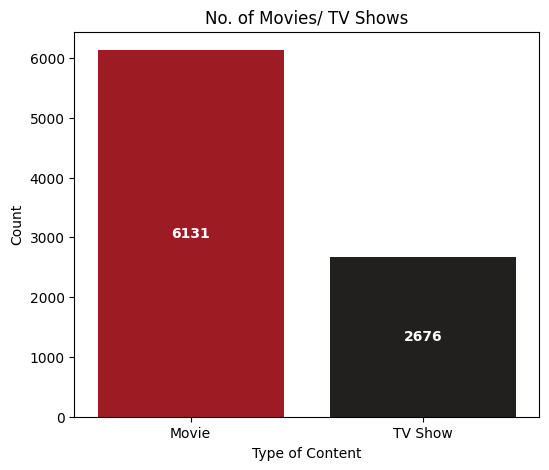

In [35]:
fig = plt.figure(figsize = (6,5))

ax = sns.barplot(data = df_type,x ='type', y= 'count',palette = pal)
for i in ax.containers:
  ax.bar_label(i, color = 'white', label_type = 'center', fontweight = 'bold')
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.title("No. of Movies/ TV Shows")
plt.show()

In [36]:
movie = df.loc[df['type'] == "Movie"]
tv = df.loc[df['type'] == "TV Show"]

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def get_top_and_plot(df, column, title="", palette="viridis", plot=True, top_n=None, figsize=(10, 4)):
    """
    Function to get the top N (or all) entries for a given column and optionally plot them.

    Parameters:
    - df (pd.DataFrame): Input DataFrame
    - column (str): Column to group by
    - title (str): Title for the plot
    - palette (str): Color palette for seaborn
    - plot (bool): If True, generates the bar plot. If False, just returns the DataFrame.
    - top_n (int or None): Number of top entries to return. If None, return all.
    - figsize (tuple): Figure size for the plot.

    Returns:
    - pd.DataFrame: DataFrame containing the grouped counts.
    """
    plt.close()  # Prevent unnecessary figures

    # Group by the column and count unique titles
    top_data = (
        df.groupby(column)['title']
        .nunique()
        .reset_index(name='count')
        .sort_values(by='count', ascending=False)
    )

    # Limit to top N if specified
    if top_n:
        top_data = top_data.head(top_n)

    # If plot is False, return the DataFrame
    if not plot:
        return top_data

    # Plot only if plot=True
    plt.figure(figsize=figsize)

    # Create the bar plot
    ax = sns.barplot(x='count', y=column, data=top_data, palette=palette, order=top_data[column])

    # Add labels inside bars
    for bar in ax.patches:
        xval = bar.get_width()
        yval = bar.get_y() + bar.get_height() / 2  # Center label vertically

        ax.text(xval - 1, yval, f'{int(xval)}', va='center', ha='right',  # Align text inside the bar
                color='white', fontsize=10, fontweight='bold')

    # Set title and labels
    ax.set_title(f'Top {top_n if top_n else "All"} {title}')
    ax.set_xlabel('# Titles')
    ax.set_ylabel(f'{column.capitalize()}')

    # Improve layout
    plt.tight_layout()
    plt.show()

    return top_data  # Return the DataFrame even when plotting

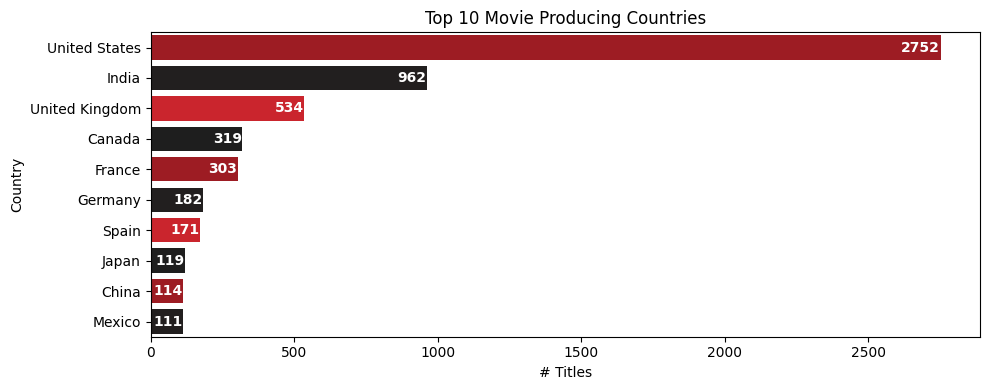

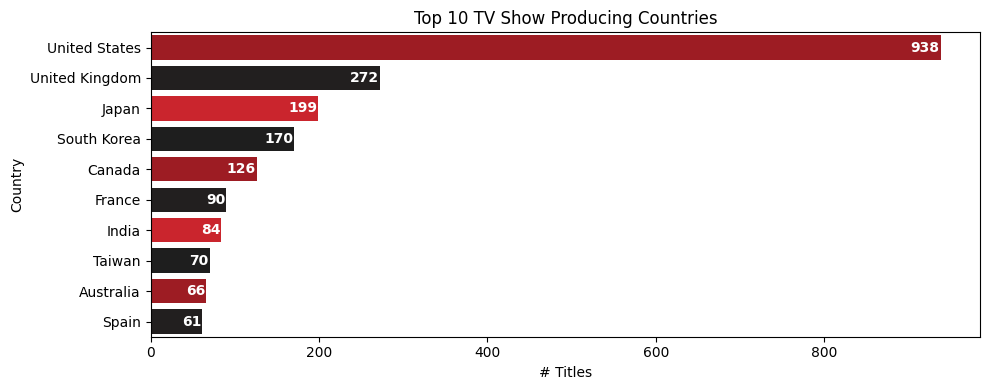

,country,count
116,United States,938
115,United Kingdom,272
54,Japan,199
101,South Korea,170
21,Canada,126
37,France,90
46,India,84
109,Taiwan,70
7,Australia,66
103,Spain,61


In [38]:
# Top 10 movie-producing countries
get_top_and_plot(df=movie[movie['country'] != 'Unknown'], column='country', title='Movie Producing Countries', palette=pal, top_n = 10)

# Top 10 TV show-producing countries
get_top_and_plot(df=tv[tv['country'] != 'Unknown'], column='country', title='TV Show Producing Countries', palette=pal, top_n = 10)

Insights:


*   USA leads in both Movie and TV Show count
*   UK is in top3 in both Movies and TV Shows
*   India is second leading in Movies where as Japan is top3 with respect to TV Shows



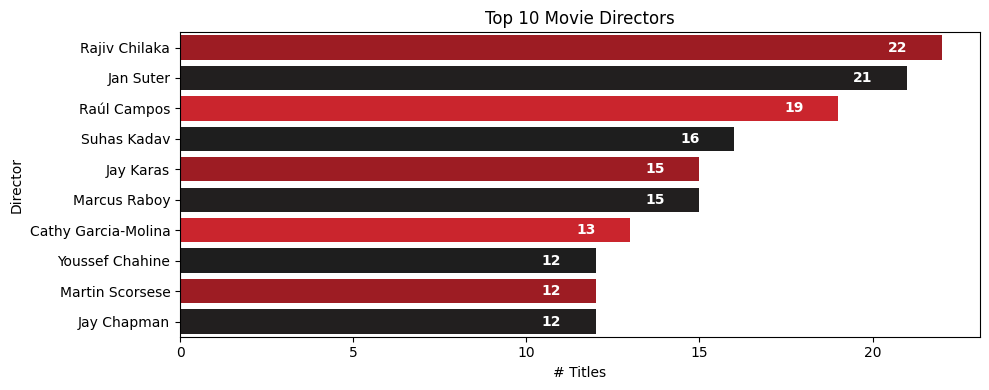

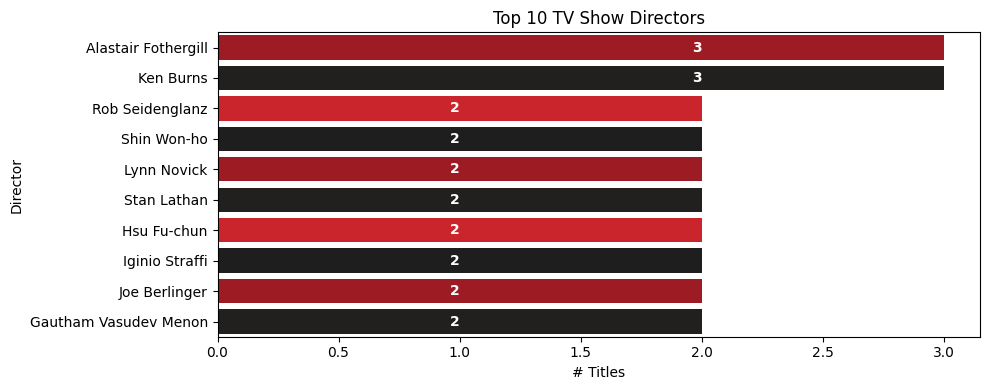

,director,count
145,Alastair Fothergill,3
2450,Ken Burns,3
3899,Rob Seidenglanz,2
4274,Shin Won-ho,2
2763,Lynn Novick,2
4360,Stan Lathan,2
1755,Hsu Fu-chun,2
1786,Iginio Straffi,2
2092,Joe Berlinger,2
1527,Gautham Vasudev Menon,2


In [39]:
# Top 10 movie-producing countries
get_top_and_plot(df=movie[movie['director'] != 'Unknown'], column='director', title='Movie Directors', palette=pal, top_n = 10, figsize=(10, 4))

# Top 10 TV show-producing countries
get_top_and_plot(df=tv[tv['director'] != 'Unknown'], column='director', title='TV Show Directors', palette=pal, top_n = 10, figsize=(10, 4))

In [40]:
toptvdirectors = (
        df[df['type'] == 'TV Show'].groupby('director')['title']
        .nunique()
        .reset_index(name='count')
        .nlargest(10, 'count')  # Select the top 10
    )

toptvdirectors

,director,count
4744,Unknown,2446
145,Alastair Fothergill,3
2450,Ken Burns,3
1527,Gautham Vasudev Menon,2
1755,Hsu Fu-chun,2
1786,Iginio Straffi,2
2092,Joe Berlinger,2
2342,Jung-ah Im,2
2763,Lynn Novick,2
3899,Rob Seidenglanz,2


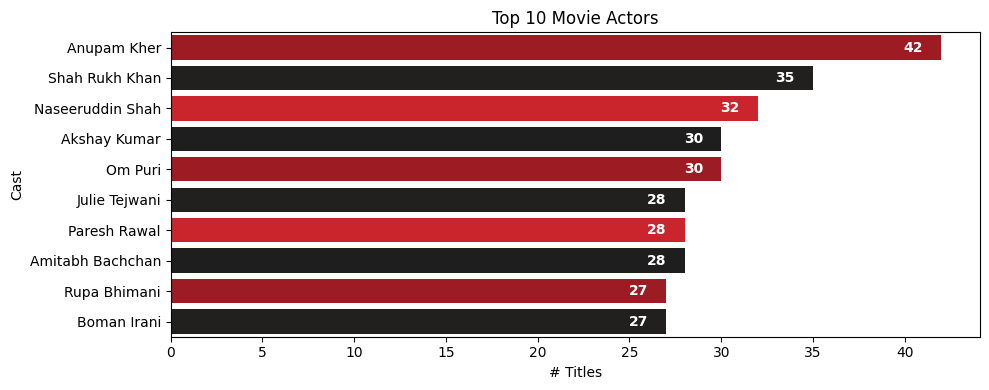

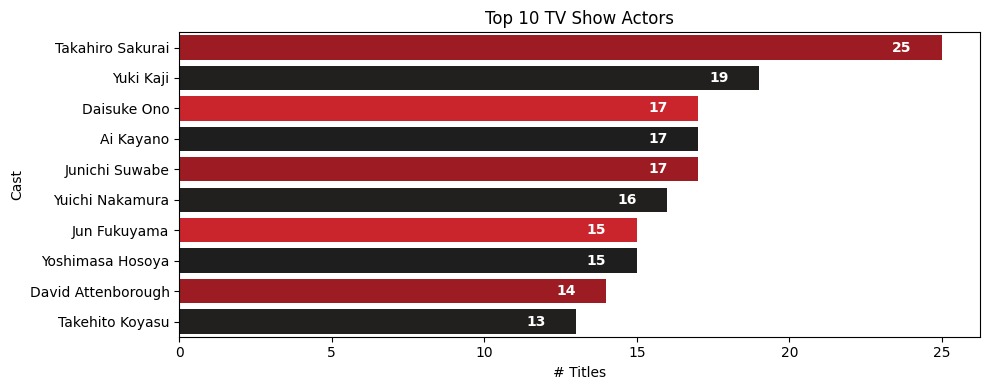

,cast,count
13230,Takahiro Sakurai,25
14580,Yuki Kaji,19
2873,Daisuke Ono,17
251,Ai Kayano,17
6804,Junichi Suwabe,17
14564,Yuichi Nakamura,16
6761,Jun Fukuyama,15
14496,Yoshimasa Hosoya,15
3126,David Attenborough,14
13245,Takehito Koyasu,13


In [41]:
# Top 10 movie-producing countries
get_top_and_plot(df=movie[movie['cast'] != 'Unknown'], column='cast', title='Movie Actors', palette=pal, top_n = 10, figsize=(10, 4))

# Top 10 TV show-producing countries
get_top_and_plot(df=tv[tv['cast'] != 'Unknown'], column='cast', title='TV Show Actors', palette=pal, top_n = 10, figsize=(10, 4))

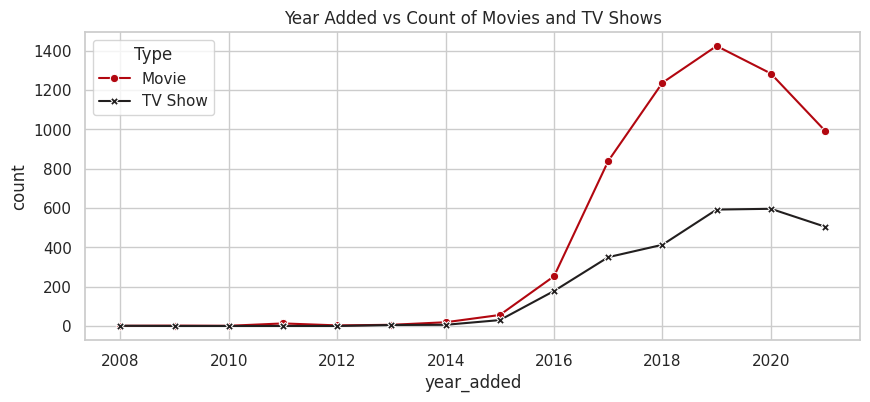

In [42]:
# Ensure only unique movie/TV show titles are counted
df_grouped = df.groupby(['year_added', 'type'])['title'].nunique().reset_index(name='count')

plt.figure(figsize=(10,4))
# Plot using Seaborn
sns.set(style="whitegrid")

sns.lineplot(
    data=df_grouped, x='year_added', y='count', style='type', hue='type',
    markers=True, dashes=False, palette=pal)

plt.legend(title='Type', loc='upper left')
plt.title('Year Added vs Count of Movies and TV Shows')
plt.show()


In [43]:
df_def = df.drop(columns=['director','cast','listed_in','country'])

In [44]:
df_def.drop_duplicates(inplace = True)

In [45]:
df_def['title'].nunique()

8807

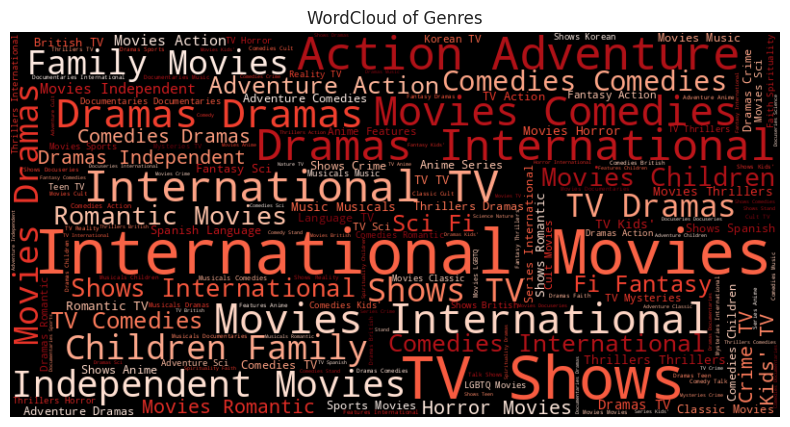

In [46]:
all_genres = ' '.join(df['listed_in'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap = 'Reds').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud of Genres')
plt.axis('off')
plt.show()

Insights:



*   Most produced genres for Movies are International Movies, Dramas, and Comedies.
*   For TV Shows, it's International TV Shows and TV Dramas.



In [47]:
month = df.groupby('month_added')['type'].value_counts().reset_index(name='count')

#converting month_added to categorical type to help in future sorting steps
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month['month_added'] = pd.Categorical(month['month_added'], categories=months, ordered=True)
month.head()

,month_added,type,count
0,April,Movie,12538
1,April,TV Show,4555
2,August,Movie,11924
3,August,TV Show,5162
4,December,Movie,12768


In [48]:
# Top 10 movie-producing countries
movie_dur = get_top_and_plot(df=movie, column='duration', title='Movie Actors', palette=pal, plot = False)

movie_dur['duration'] = movie_dur['duration'].str.extract('(\d+)')
movie_dur['duration'] = pd.to_numeric(movie_dur['duration'])


tv_dur = get_top_and_plot(df=tv, column='duration', title='Movie Actors', palette=pal, plot = False)

tv_dur['duration'] = tv_dur['duration'].str.extract('(\d+)')
tv_dur['duration'] = pd.to_numeric(tv_dur['duration'])

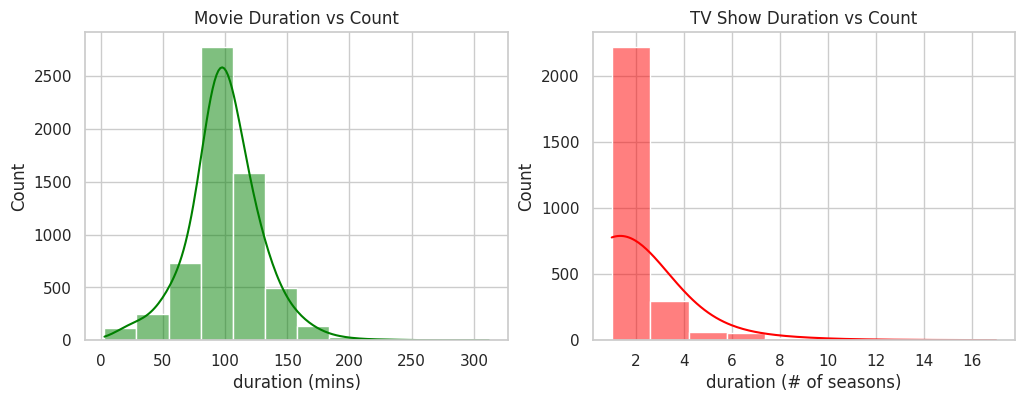

In [49]:
sns.set(style="whitegrid")
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.histplot(data=movie_dur,x='duration',weights='count',bins=12,kde=True,color='green')
plt.title('Movie Duration vs Count')
plt.xlabel('duration (mins)')
plt.subplot(1,2,2)
sns.histplot(data=tv_dur,x='duration',weights='count',bins=10,kde=True,color='red')
plt.title('TV Show Duration vs Count')
plt.xlabel('duration (# of seasons)')
plt.show()

Insights:


*   Distribution of movie duration is slightly right-skewed, with a peak at 90 to 100 minutes.
*   TV Shows have a peak around 1 season, with a median of 2-3 seasons.



In [50]:
# Top 10 movie-producing countries
movie_week = get_top_and_plot(df=movie, column='week_added', title='Movie Actors', palette=pal, plot = False)

# movie_week['duration'] = movie_dur['duration'].str.extract('(\d+)')
#movie_week['duration'] = pd.to_numeric(movie_dur['duration'])


tv_week = get_top_and_plot(df=tv, column='week_added', title='Movie Actors', palette=pal, plot = False)

# tv_week['duration'] = tv_dur['duration'].str.extract('(\d+)')
# tv_week['duration'] = pd.to_numeric(tv_dur['duration'])

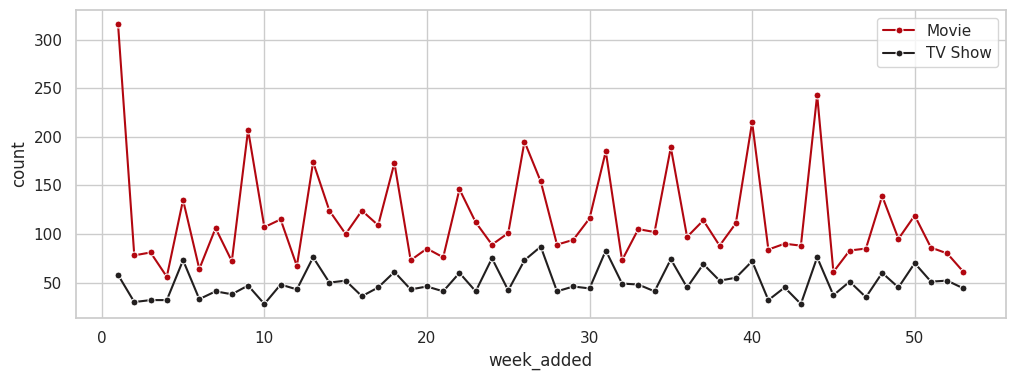

In [51]:
plt.figure(figsize = (12,4))
sns.lineplot(data = movie_week, x = 'week_added', y = 'count',marker = 'o',markersize = 5,color ='#b20710',
             label = 'Movie')
sns.lineplot(data = tv_week, x = 'week_added', y = 'count',marker = 'o',markersize = 5,color ='#221f1f',
             label = 'TV Show')
plt.show()

In [52]:
# # best month Movie release
# monthmovie=movie_group.groupby('month_added',as_index=False)['title'].nunique()
# monthmovie.columns=['month','count']
# monthmovie = monthmovie.sort_values('count', ascending=False).iloc[:10, :]
# monthmovie.reset_index(inplace=True)
# monthmovie.drop(columns=['index'],inplace=True)

# # best month for TV Show release
# monthtv_show=tv_group.groupby('month_added',as_index=False)['title'].nunique()
# monthtv_show.columns=['month','count']
# monthtv_show = monthtv_show.sort_values('count', ascending=False).iloc[:10, :]
# monthtv_show.reset_index(inplace=True)
# monthtv_show.drop(columns=['index'],inplace=True)

NameError: name 'movie_group' is not defined

In [ ]:
# sns.set(style="whitegrid")
# plt.figure(figsize = (14,5))
# plt.subplot(1,2,1)
# sns.barplot(data=monthmovie, x='month', y='count', order=monthmovie['month'].tolist(),palette = 'rocket')
# plt.title('Month number vs count of Movies')
# plt.subplot(1,2,2)
# sns.barplot(data=monthtv_show, x='month', y='count', order=monthtv_show['month'].tolist(),palette = 'rocket')
# plt.title('Month number vs count of TV Shows')
# plt.show()

In [54]:
movie_rating = get_top_and_plot(df=movie, column='rating', title='Movie Actors', palette=pal, plot = False)
tv_rating = get_top_and_plot(df=tv, column='rating', title='Movie Actors', palette=pal, plot = False)

In [ ]:
movie_rating

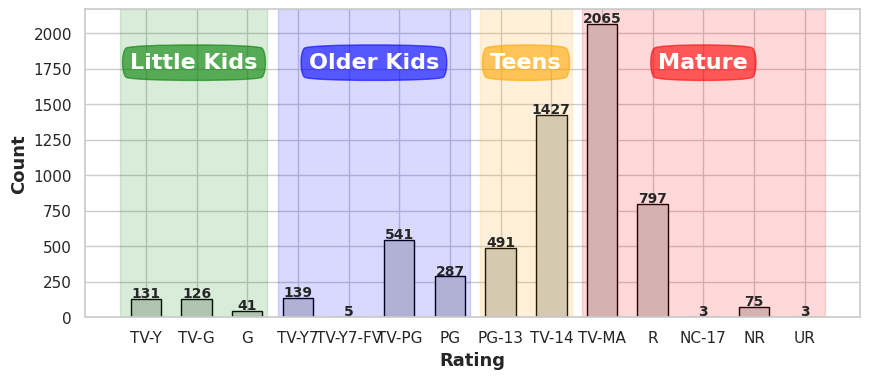

In [58]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Define ratings in order
rating_order = ['TV-Y', 'TV-G', 'G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG',
                'PG-13', 'TV-14', 'TV-MA', 'R', 'NC-17', 'NR', 'UR']

# Plot bars
counts = movie_rating.set_index('rating')['count']
ax.bar(rating_order, counts.reindex(rating_order, fill_value=0), color='#d0d0d0',edgecolor = 'black', width=0.6)

# Labels
ax.set_xlabel('Rating', fontweight='bold', fontsize=13)
ax.set_ylabel('Count', fontweight='bold', fontsize=13)

# Add value labels above bars
for rating in rating_order:
    count = counts.get(rating, 0)
    ax.text(rating, count + 40, str(count), ha='center', va='center', fontsize=10, fontweight='bold')

# Color patches for rating categories
categories = ['Little Kids', 'Older Kids', 'Teens', 'Mature']
colors = ['green', 'blue', 'orange', 'red']
ranges = [[-0.5, 2.4], [2.6, 6.4], [6.6, 8.4], [8.6, 13.4]]

for (start, end), color, category in zip(ranges, colors, categories):
    ax.axvspan(start, end, color=color, alpha=0.15)  # Background color
    ax.annotate(category, xy=((start + end) / 2, 1750), ha="center", color="w",
                fontsize=16, fontweight='bold', bbox=dict(boxstyle='round4', pad=0.4, color=color, alpha=0.6))
plt.show()

In [59]:
def plot_rating_distribution(data, title, pal, max_count=1750):
    """
    Plots the rating distribution for movies or TV shows.

    Parameters:
    - data: DataFrame containing 'rating' and 'count' columns.
    - title: Title of the plot (e.g., "Movies", "TV Shows").
    - pal: Color palette.
    - max_count: Maximum Y position for category labels.
    """
    fig, ax = plt.subplots(figsize=(10, 4))

    # Rating categories in order
    rating_order = ['TV-Y', 'TV-G', 'G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG',
                    'PG-13', 'TV-14', 'TV-MA', 'R', 'NC-17', 'NR', 'UR']

    # Plot bars
    counts = data.set_index('rating')['count']
    ax.bar(rating_order, counts.reindex(rating_order, fill_value=0), color=pal[0], width=0.6)

    # Labels
    ax.set_xlabel('Rating', fontweight='bold', fontsize=13)
    ax.set_ylabel('Count', fontweight='bold', fontsize=13)
    ax.set_title(f'Rating Distribution for {title}', fontweight='bold', fontsize=14)

    # Add value labels above bars
    for rating in rating_order:
        count = counts.get(rating, 0)
        ax.text(rating, count + 40, str(count), ha='center', va='center', fontsize=10, fontweight='bold')

    # Color patches for rating categories
    categories = ['Little Kids', 'Older Kids', 'Teens', 'Mature']
    colors = ['green', 'blue', 'orange', 'red']
    ranges = [[-0.5, 2.4], [2.6, 6.4], [6.6, 8.4], [8.6, 13.4]]

    for (start, end), color, category in zip(ranges, colors, categories):
        ax.axvspan(start, end, color=color, alpha=0.15)  # Background color
        ax.annotate(category, xy=((start + end) / 2, max_count), ha="center", color="w",
                    fontsize=16, fontweight='bold', bbox=dict(boxstyle='round4', pad=0.4, color=color, alpha=0.6))

    plt.show()


Insights:



*   Most Movies are added in week 1, and most TV Shows are added in week 27.
*   July is the peak month for adding Movies whereas for TV Shows it is December.




Insights:

The number of movies and TV Shows added per year is both similar increasing curves from 2015 to 2019 and then decreasing.Between movies and TV shows more number of movies are added each year so Netflix is not focusing more on TV Shows recently.

## **Recommendations**:



1.   Focus on producing more International Movies, Dramas, and Comedies, as these genres have shown popularity. For TV Shows, prioritize International TV Shows and TV Dramas
2.   Movies of duration close to 2 hrs and TV Shows with 1-4 seasons suggested.
3.   USA is leading the consumer market for Netflix, create content thet should resound with bigger market audiences like USA.
4.   For Movies consider releasing in Week 1 and July to  maximize viewership
5.   For TV shows Week 27 and December seems to be popular, aligning releases with these times may attract more audience
6.   For future projects include casts & directors from the top 10  members for both Movie and TV Shows categories.
7. Find out why after 2019-2020 there is a decline in number of movies released as well as number of movies added and solve the problem.
8. As there is a higher number of movies added each year compared to TV shows, consider a balanced approach based on the observed trend.
